In [ ]:
import pandas as pd

df = pd.read_csv(f'./cve24p_analysis.csv')
with open("./cve24p.smi","w") as f:
    for smi in df["smi"]:
        f.write(smi+"\n")
    

In [ ]:
import random

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]

random.seed(42)

for filename in filenames:
    smis = []
    with open(f"../data/3_PCA/{filename}.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smis.append(line.replace("\n",""))
    idxs = random.sample(range(len(smis)),30000)
    with open(f"../data/3_PCA/{filename}_sampled.smi","w") as f:
        for idx in idxs:
            f.write(smis[idx]+"\n")

In [ ]:
from sklearn.decomposition import PCA
from collections import defaultdict
import numpy as np

from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)


pca = PCA(n_components=2, random_state=42)

data_all = []
data_each = defaultdict(list)

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]

for filename in filenames:
    with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smi = line.replace("\n","")
                fp = np.array(fpgen.GetFingerprint(Chem.MolFromSmiles(smi)))
                data_all.append(fp)
                data_each[filename].append(fp)

data_all = np.array(data_all)
for k,v in data_each.items():
    data_each[k] = np.array(v)

pca.fit(data_all)

import pickle

with open("../data/3_PCA/PCA.pkl","wb") as f:
    pickle.dump(pca,f)

[array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0, 0, ..., 0, 0, 0], shape=(2048,)), array([0, 0,

In [13]:
print(pca.explained_variance_ratio_)

[0.24338449 0.05158695]


In [57]:
import pickle
from sklearn.decomposition import PCA
from collections import defaultdict
import numpy as np

from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator


fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)


data_each = defaultdict(list)

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]

for filename in filenames:
    with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smi = line.replace("\n","")
                fp = np.array(fpgen.GetFingerprint(Chem.MolFromSmiles(smi)))
                data_each[filename].append(fp)

import matplotlib.pyplot as plt

with open("../data/3_PCA/PCA.pkl", "rb") as f:
    pca = pickle.load(f)


color_dict = {
    "COMPAS-1": "tab:green",
    "COMPAS-3x": "tab:olive",
    "cve": "tab:blue",
    "cve24p": "tab:orange"
}

pts = []
cols = []
labels_all = []

for label, data in data_each.items():
    X_pca = pca.transform(data)
    pts.append(X_pca[:, :2])
    cols.append(np.full(len(data), color_dict[label], dtype=object))
    labels_all.append(np.full(len(data), label, dtype=object))

pts = np.vstack(pts)
cols = np.concatenate(cols)
labels_all = np.concatenate(labels_all)

np.random.seed(42)
idx = np.random.permutation(len(pts))
pts = pts[idx]
cols = cols[idx]
labels_all = labels_all[idx]

with open("../data/3_PCA/pts.pkl", "wb") as f:
    pickle.dump(pts,f)

with open("../data/3_PCA/cols.pkl", "wb") as f:
    pickle.dump(cols,f)

with open("../data/3_PCA/labels_all.pkl", "wb") as f:
    pickle.dump(labels_all,f)




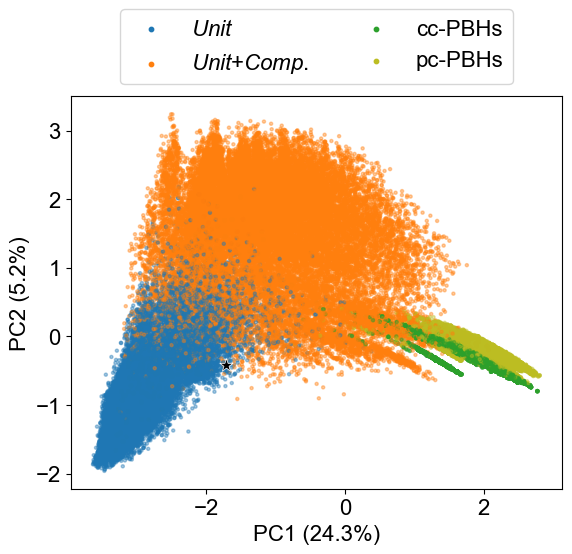

In [ ]:
import pickle
from sklearn.decomposition import PCA
from collections import defaultdict
import numpy as np


plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"


with open("../data/3_PCA/PCA.pkl", "rb") as f:
    pca = pickle.load(f)

with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)

with open("../data/3_PCA/cols.pkl", "rb") as f:
    cols = pickle.load(f)

with open("../data/3_PCA/labels_all.pkl", "rb") as f:
    labels_all = pickle.load(f)

plt.figure(figsize=(6, 6))
plt.scatter(pts[:, 0], pts[:, 1], c=cols, s=5, alpha=0.4)

color_dict = {
    "COMPAS-1": "tab:green",
    "COMPAS-3x": "tab:olive",
    "cve": "tab:blue",
    "cve24p": "tab:orange"
}

label_dict = {
    "cve": r"$\mathit{Unit}$",
    "cve24p": r"$\mathit{Unit}$+$\mathit{Comp.}$",
    "COMPAS-1": r"cc-PBHs",
    "COMPAS-3x": r"pc-PBHs",
}


for k in label_dict.keys():
    plt.scatter([], [], c=color_dict[k], label=label_dict[k], s=10)

from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)



h2_fp = [np.array(fpgen.GetFingerprint(Chem.MolFromSmiles("[H][H]")))]
h2_pca = pca.transform(h2_fp)

plt.scatter(h2_pca[:, 0], h2_pca[:, 1], c="black", marker="*",edgecolors="white", linewidths=0.5, s=100)

plt.xlabel("PC1 (24.3%)")
plt.ylabel("PC2 (5.2%)")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.25),
    ncol=2
)
plt.tight_layout()
plt.show()

    

In [ ]:
import csv

with open("../data/3_PCA/PCA_coords.csv","w", newline="", encoding="utf-8") as f_csv:
    writer_csv = csv.writer(f_csv)
    writer_csv.writerow(["SMILES","Category","PC1","PC2"])
    for filename in filenames:
        with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
            for line in f.readlines():
                if line != "\n":
                    smi = line.replace("\n","")
                    fp = np.array(fpgen.GetFingerprint(Chem.MolFromSmiles(smi)))
                    pc = pca.transform([fp])
                    writer_csv.writerow([smi,filename,pc[0,0],pc[0,1]])

COMPAS-1 done
COMPAS-3x done
cve done
cve24p done


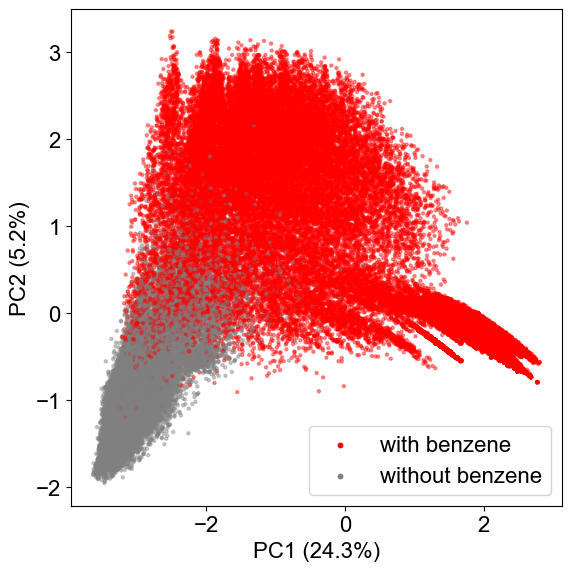

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"


with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)



from pathlib import Path
import sys
proj_root = (Path.cwd().parent).resolve()
sys.path.insert(0, str(proj_root))

cols = []
labels = []

from src.rediscovery import RediscoverySubstructure

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]
for filename in filenames:
    with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smi = line.replace("\n","")
                rds = RediscoverySubstructure(target_smi=smi)
                if rds.score("c1ccccc1") > -0.5:
                    cols.append("red")
                    labels.append("with benzene")
                else:
                    cols.append("gray")
                    labels.append("without benzene")
        print(filename,"done")

cols = np.array(cols)
labels = np.array(labels)

np.random.seed(42)
idx = np.random.permutation(len(pts))
cols = cols[idx]
labels = labels[idx]

plt.figure(figsize=(6, 6))

plt.scatter(pts[:, 0], pts[:, 1], c=cols, s=5, alpha=0.4)

plt.scatter([], [], c="red", label="with benzene", s=10)
plt.scatter([], [], c="gray", label="without benzene", s=10)

plt.xlabel("PC1 (24.3%)")
plt.ylabel("PC2 (5.2%)")
plt.legend()
plt.tight_layout()
plt.show()

    

COMPAS-1 done
COMPAS-3x done
cve done
cve24p done


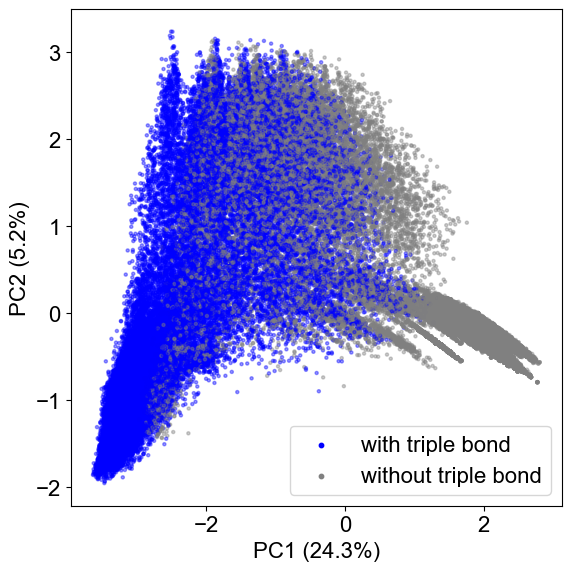

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"


with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)



from pathlib import Path
import sys
proj_root = (Path.cwd().parent).resolve()
sys.path.insert(0, str(proj_root))

cols = []
labels = []


filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]
for filename in filenames:
    with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smi = line.replace("\n","")
                if "#" in smi:
                    cols.append("blue")
                    labels.append("with triple bond")
                else:
                    cols.append("gray")
                    labels.append("without triple bond")
        print(filename,"done")

cols = np.array(cols)
labels = np.array(labels)

np.random.seed(42)
idx = np.random.permutation(len(pts))
cols = cols[idx]
labels = labels[idx]

plt.figure(figsize=(6, 6))

plt.scatter(pts[:, 0], pts[:, 1], c=cols, s=5, alpha=0.4)

plt.scatter([], [], c="blue", label="with triple bond", s=10)
plt.scatter([], [], c="gray", label="without triple bond", s=10)

plt.xlabel("PC1 (24.3%)")
plt.ylabel("PC2 (5.2%)")
plt.legend()
plt.tight_layout()
plt.show()

    

COMPAS-1 done
COMPAS-3x done
cve done
cve24p done


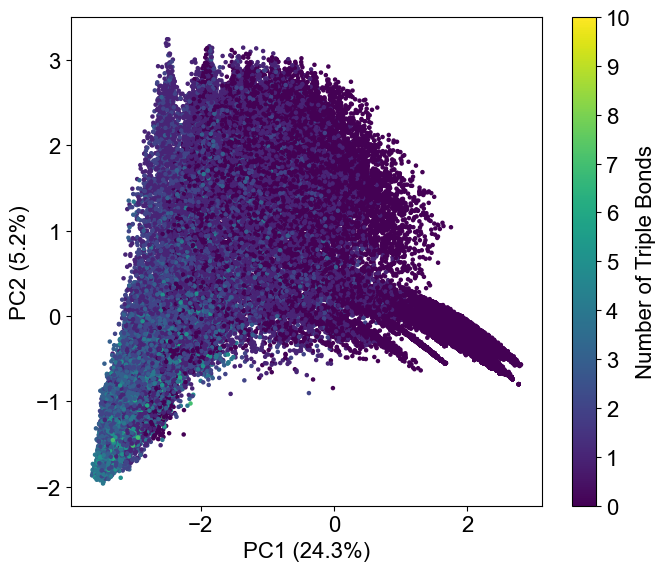

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"


with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)



from pathlib import Path
import sys
proj_root = (Path.cwd().parent).resolve()
sys.path.insert(0, str(proj_root))

cols = []
labels = []

import matplotlib.colors as colors
norm = colors.Normalize(vmin=0, vmax=10)

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]
for filename in filenames:
    with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smi = line.replace("\n","")
                cols.append(norm(smi.count("#")))
                labels.append(smi.count("#"))
        print(filename,"done")

cols = np.array(cols)
labels = np.array(labels)

np.random.seed(42)
idx = np.random.permutation(len(pts))
cols = cols[idx]
labels = labels[idx]

plt.figure(figsize=(7, 6))

plt.scatter(pts[:, 0], pts[:, 1], c=labels, s=5, cmap="viridis", norm=norm)

plt.xlabel("PC1 (24.3%)")
plt.ylabel("PC2 (5.2%)")
plt.colorbar(label="Number of Triple Bonds",ticks=range(11))
plt.tight_layout()
plt.show()

    

COMPAS-1 done
COMPAS-3x done
cve done
cve24p done


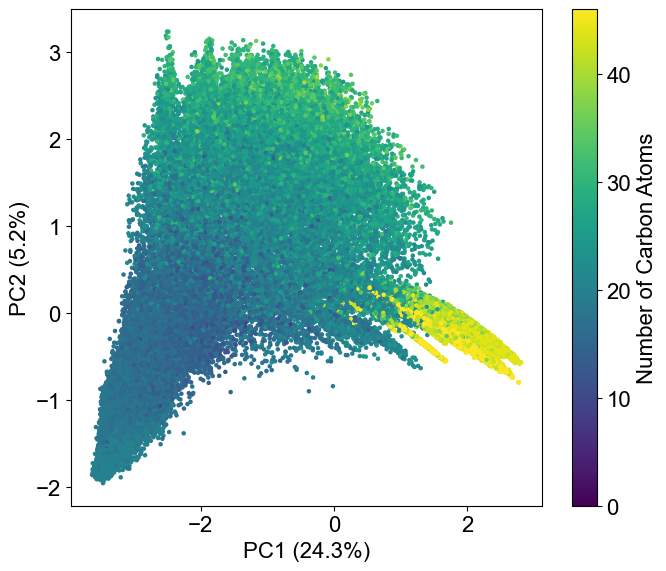

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"


with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)



from pathlib import Path
import sys
proj_root = (Path.cwd().parent).resolve()
sys.path.insert(0, str(proj_root))

cols = []
labels = []

import matplotlib.colors as colors
norm = colors.Normalize(vmin=0, vmax=10)

max_value = 0

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]
for filename in filenames:
    with open(f"../data/3_PCA/{filename}_sampled.smi","r") as f:
        for line in f.readlines():
            if line != "\n":
                smi = line.replace("\n","")
                max_value = max(max_value, smi.count("C")+smi.count("c"))
                # cols.append(norm(smi.count("#")))
                labels.append(smi.count("C")+smi.count("c"))
        print(filename,"done")

norm = colors.Normalize(vmin=0, vmax=max_value)

# cols = np.array(cols)
labels = np.array(labels)

np.random.seed(42)
idx = np.random.permutation(len(pts))
# cols = cols[idx]
labels = labels[idx]

plt.figure(figsize=(7, 6))

plt.scatter(pts[:, 0], pts[:, 1], c=labels, s=5, cmap="viridis", norm=norm)

plt.xlabel("PC1 (24.3%)")
plt.ylabel("PC2 (5.2%)")
plt.colorbar(label="Number of Carbon Atoms")
plt.tight_layout()
plt.show()

    